# 1-4-ライブラリ

- 標準ライブラリ
- サードパーティ製パッケージ

# 標準ライブラリ

Pythonには数多くの標準ライブラリがある

例えば、以下のような物がある

- 日付を扱う datetime
- 10進数を扱う decimal
- 分数を扱う fractions
- 乱数を扱う random
- 正規表現を使う re
- 数学関係 math


https://docs.python.org/ja/3/library/index.html

In [1]:
import random
random.choice([1, 2, 3])

3

In [2]:
random.random()

0.14415281976672079

In [3]:
import re
re.search(r'[0-9]+', 'test234')

<re.Match object; span=(4, 7), match='234'>

In [4]:
import math
math.sin(3.14)

0.0015926529164868282

In [5]:
from math import sin
sin(0)

0.0

In [6]:
import math as m
m.sin(1.57)

0.9999996829318346

# サードパーティ製パッケージ

Python標準にない機能を提供

例えば、以下のような物がある

- NumPy (配列演算)
- SciPy (科学技術計算)
- pandas (DataFrame)
- Matplotlib (可視化ツール)
- Scikit-learn (機械学習ツールキット)
- Jupyter Notebook (ブラウザ上でPythonの実行ができる)
- BeautifulSoup4 (HTML解析)

## 導入方法

- pipを使う
- Anacondaに同梱 もしくは condaを使う

```
$ pip install numpy
```

In [7]:
import numpy as np
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
X1 = np.array([[1, 2, 3], [4, 5, 6]])
X2 = np.array([[1, 2], [3, 4], [5, 6]])
X1 @ X2

array([[22, 28],
       [49, 64]])

In [9]:
from scipy.stats import norm
norm.rvs(loc=0, scale=1, size=1)

array([-1.0198376])

In [10]:
norm.rvs(loc=0, scale=1, size=100)

array([ 1.13223686, -1.66794401,  0.49140117, -1.18867884, -1.73186696,
       -0.78691339,  0.30476353, -0.04791774, -1.47455803, -0.58253347,
        0.35082675, -1.42326827, -0.1000032 ,  0.09969498,  1.05559651,
       -0.61465086, -0.25999572,  0.56524017, -2.00910602, -0.61887752,
        1.53611454, -0.05377872, -0.74383391,  0.13471359,  0.49923096,
       -0.58792337,  1.66057311,  0.07293652, -0.35258253,  1.36850609,
       -1.21357311,  0.31734337,  0.6250252 ,  0.32992956, -1.12685079,
       -0.41485398,  1.38154289, -1.07763434,  0.58456852,  0.31963053,
        0.24448625, -0.60308526, -0.84136372,  0.61614626,  0.12075301,
        0.22489721, -0.11287585,  0.11136136, -0.36148318,  2.12267958,
       -0.61361063,  1.80563203,  0.6303375 , -1.80320496,  0.16713603,
       -2.06455036,  0.10152395,  0.42099639,  0.39874399, -0.79999338,
       -0.11760937,  0.80659304, -0.38057281, -0.98109761,  0.02545356,
        1.17184805,  0.57539564,  0.12432134, -2.38075574, -0.41

In [11]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [12]:
df.mean()

0    4.0
1    5.0
2    6.0
dtype: float64

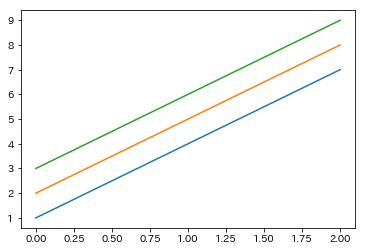

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df)

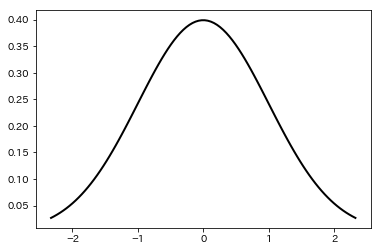

In [14]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [15]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = 1 - data.target
# ラベルの0と1を反転

X = X[:, :10]
from sklearn.linear_model import LogisticRegression
model_lor = LogisticRegression(solver='lbfgs')
model_lor.fit(X, y)
y_pred = model_lor.predict(X)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[337  20]
 [ 30 182]]


In [17]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

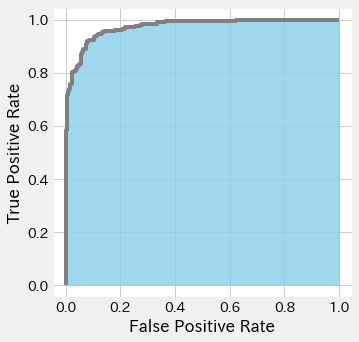

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)

ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()